# Convolutional Neural Network
Here, we will use CNN to run image classification on pnemonia data.

## Import
---
Importing necessary packages and data

In [100]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras import models, layers, optimizers

import pickle

import os
import gc
from timeit import default_timer as timer

### Image Directories

In [2]:
train_dir = 'DATA/train'
test_dir = 'DATA/test'
val_dir = 'DATA/validation'

In [3]:
# remove unnecessary variables clogging memory
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Preprocess
---

In [56]:
#os.mkdir('DATA/aug_test')

In [87]:
train_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (150,150), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')
test_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(test_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary', shuffle=False)


Found 4043 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.
Found 586 images belonging to 2 classes.


## Baseline Model
---

In [6]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Evaluation Metrics
Since we don't want to miss any true pneumonia case, we will prioritize the recall score.

In [7]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [13]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=100, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
127/127 [==============================] - 71s 556ms/step - loss: 0.0846 - accuracy: 0.9676 - recall: 0.9780 - val_loss: 0.0669 - val_accuracy: 0.9772 - val_recall: 0.9973
Epoch 2/100
127/127 [==============================] - 74s 586ms/step - loss: 0.0740 - accuracy: 0.9711 - recall: 0.9777 - val_loss: 0.0557 - val_accuracy: 0.9812 - val_recall: 0.9907
Epoch 3/100
127/127 [==============================] - 73s 575ms/step - loss: 0.0672 - accuracy: 0.9745 - recall: 0.9813 - val_loss: 0.0477 - val_accuracy: 0.9842 - val_recall: 0.9947
Epoch 4/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0614 - accuracy: 0.9745 - recall: 0.9807 - val_loss: 0.0475 - val_accuracy: 0.9822 - val_recall: 0.9867
Epoch 5/100
127/127 [==============================] - 73s 572ms/step - loss: 0.0576 - accuracy: 0.9770 - recall: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9812 - val_recall: 0.9787
Epoch 6/100
127/127 [==============================] - 73s 576ms/step - loss: 0.

Epoch 89/100
127/127 [==============================] - 72s 569ms/step - loss: 0.0016 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.1436 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 90/100
127/127 [==============================] - 72s 568ms/step - loss: 4.2941e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 91/100
127/127 [==============================] - 72s 567ms/step - loss: 3.0501e-06 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.3077 - val_accuracy: 0.9743 - val_recall: 1.0000
Epoch 92/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0015 - accuracy: 0.9998 - recall: 0.9997 - val_loss: 0.1359 - val_accuracy: 0.9861 - val_recall: 0.9933
Epoch 93/100
127/127 [==============================] - 73s 573ms/step - loss: 6.9887e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 94/100
127/127 [==============================] - 73s 578

In [9]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, hist_['recall'], label='Training recall')
    plt.plot(epochs, hist_['val_recall'], label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    
    plt.show()
    
#plot_performance(history)

In [15]:
# saving model
#os.mkdir('MODEL')
model.save('MODEL/baseline_model.h5')

It seems like around 16-18 is ideal number of epoch.

It seems like the testing loss is much higher compared to the training loss. This will benefit from having more data. So we will implement data augmentation. But before that, I want to address 2 foundational issues first.  
1. Test different optimizer  
2. Test balancing the class weight as our data is slightly imbalance.  

## Optimizer
Testing Adam optimizer

In [72]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 77s 602ms/step - loss: 0.2862 - accuracy: 0.8795 - recall: 0.9587 - val_loss: 0.1085 - val_accuracy: 0.9574 - val_recall: 0.9813
Epoch 2/20
127/127 [==============================] - 77s 609ms/step - loss: 0.1113 - accuracy: 0.9584 - recall: 0.9703 - val_loss: 0.1562 - val_accuracy: 0.9386 - val_recall: 0.9933
Epoch 3/20
127/127 [==============================] - 77s 607ms/step - loss: 0.1008 - accuracy: 0.9577 - recall: 0.9680 - val_loss: 0.0664 - val_accuracy: 0.9743 - val_recall: 0.9787
Epoch 4/20
127/127 [==============================] - 77s 606ms/step - loss: 0.0780 - accuracy: 0.9718 - recall: 0.9777 - val_loss: 0.0628 - val_accuracy: 0.9762 - val_recall: 0.9813
Epoch 5/20
127/127 [==============================] - 77s 604ms/step - loss: 0.0571 - accuracy: 0.9790 - recall: 0.9823 - val_loss: 0.0686 - val_accuracy: 0.9762 - val_recall: 0.9773
Epoch 6/20
127/127 [==============================] - 76s 599ms/step - loss: 0.0574 -

KeyboardInterrupt: 

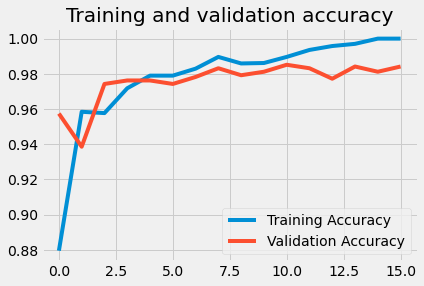

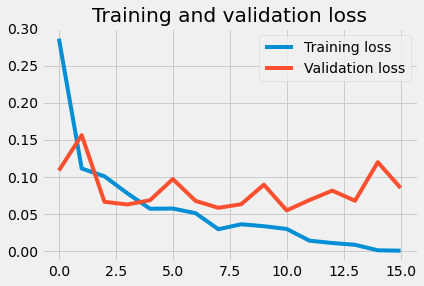

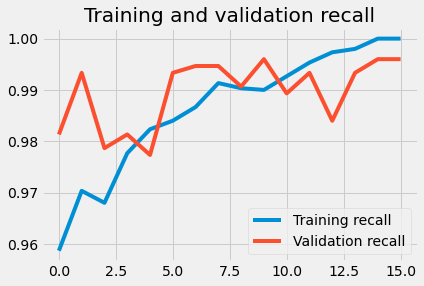

In [77]:
plot_performance(model.history)

It seems like Adams optimizer indeed converged much sooner than RMSprop. We will use Adams going forward.

## Balanced Class Weight
Balancing class weight to see if it helps.

In [19]:
# find the weight
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', [0, 1], train_g.classes)
weights = dict(zip([0, 1], weights))

D:\ProgramData\Anaconda3\envs\workspace-gpu\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0, 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [20]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g, 
                    epochs=15, 
                    class_weight=weights,
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

model.save('MODEL/balanced_weight.h5')

Epoch 1/15
127/127 [==============================] - 72s 569ms/step - loss: 0.3827 - accuracy: 0.8209 - recall: 0.8281 - val_loss: 0.2155 - val_accuracy: 0.9238 - val_recall: 0.9080
Epoch 2/15
127/127 [==============================] - 74s 583ms/step - loss: 0.1397 - accuracy: 0.9419 - recall: 0.9354 - val_loss: 0.1711 - val_accuracy: 0.9317 - val_recall: 0.9093
Epoch 3/15
127/127 [==============================] - 74s 582ms/step - loss: 0.1040 - accuracy: 0.9622 - recall: 0.9587 - val_loss: 0.1465 - val_accuracy: 0.9426 - val_recall: 0.9253
Epoch 4/15
127/127 [==============================] - 78s 611ms/step - loss: 0.0848 - accuracy: 0.9681 - recall: 0.9643 - val_loss: 0.1403 - val_accuracy: 0.9436 - val_recall: 0.9240
Epoch 5/15
127/127 [==============================] - 74s 582ms/step - loss: 0.0763 - accuracy: 0.9688 - recall: 0.9660 - val_loss: 0.0593 - val_accuracy: 0.9802 - val_recall: 0.9827
Epoch 6/15
127/127 [==============================] - 72s 568ms/step - loss: 0.0639 -

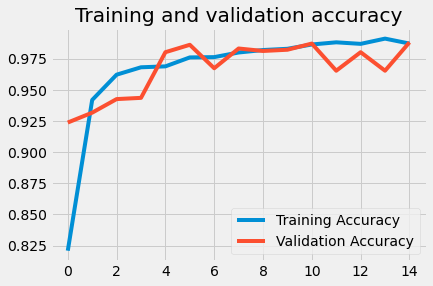

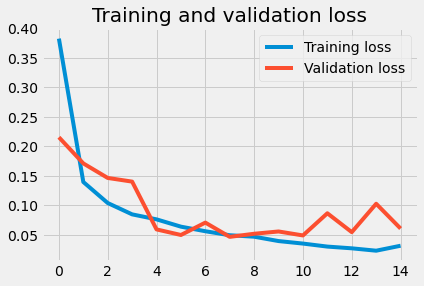

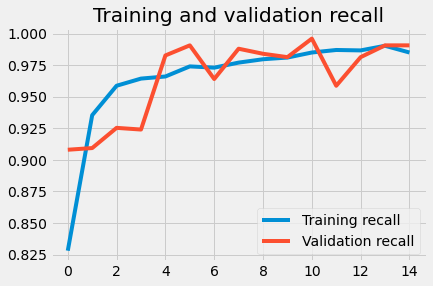

In [21]:
plot_performance(history)

It seems like balanced class weight is very slightly lowering validation loss.

## Data Augmentation
---
Now we will try adding more data. From the baseline models, we saw that training do converge to 100% accuracy, even though the validation tends to plateau much sooner. 

### Model 1 
Baseline model with more data (augmented) + epochs

In [96]:
data_aug_train = image.ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.1, 
                                   height_shift_range = 0.1,
                                   brightness_range = [0.7, 1.0],
                                   zoom_range = 0.1)

train_g2 = data_aug_train.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')

Found 4043 images belonging to 2 classes.


In [97]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

Epoch 1/40
127/127 [==============================] - 115s 902ms/step - loss: 0.5015 - accuracy: 0.7727 - recall: 0.9607 - val_loss: 0.2543 - val_accuracy: 0.8921 - val_recall: 0.8960
Epoch 2/40
127/127 [==============================] - 113s 891ms/step - loss: 0.2671 - accuracy: 0.8847 - recall: 0.9274 - val_loss: 0.1235 - val_accuracy: 0.9505 - val_recall: 0.9640
Epoch 3/40
127/127 [==============================] - 114s 896ms/step - loss: 0.2226 - accuracy: 0.9072 - recall: 0.9424 - val_loss: 0.1097 - val_accuracy: 0.9535 - val_recall: 0.9627
Epoch 4/40
127/127 [==============================] - 113s 890ms/step - loss: 0.1885 - accuracy: 0.9211 - recall: 0.9454 - val_loss: 0.1314 - val_accuracy: 0.9584 - val_recall: 0.9907
Epoch 5/40
127/127 [==============================] - 112s 885ms/step - loss: 0.1761 - accuracy: 0.9300 - recall: 0.9540 - val_loss: 0.0801 - val_accuracy: 0.9782 - val_recall: 0.9907
Epoch 6/40
127/127 [==============================] - 113s 887ms/step - loss: 0.

KeyboardInterrupt: 

In [111]:
# training
start = timer()

history = model.fit(train_g2, 
                    epochs=120, 
                    initial_epoch=90,
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 91/120
127/127 [==============================] - 114s 898ms/step - loss: 0.0421 - accuracy: 0.9834 - recall: 0.9867 - val_loss: 0.0581 - val_accuracy: 0.9901 - val_recall: 0.9933
Epoch 92/120
127/127 [==============================] - 114s 895ms/step - loss: 0.0434 - accuracy: 0.9844 - recall: 0.9887 - val_loss: 0.0593 - val_accuracy: 0.9842 - val_recall: 0.9973
Epoch 93/120
127/127 [==============================] - 113s 892ms/step - loss: 0.0408 - accuracy: 0.9837 - recall: 0.9877 - val_loss: 0.0629 - val_accuracy: 0.9851 - val_recall: 0.9907
Epoch 94/120
127/127 [==============================] - 114s 895ms/step - loss: 0.0375 - accuracy: 0.9861 - recall: 0.9890 - val_loss: 0.0508 - val_accuracy: 0.9901 - val_recall: 0.9933
Epoch 95/120
127/127 [==============================] - 114s 895ms/step - loss: 0.0417 - accuracy: 0.9827 - recall: 0.9873 - val_loss: 0.0556 - val_accuracy: 0.9842 - val_recall: 0.9880
Epoch 96/120
127/127 [==============================] - 113s 891ms/ste

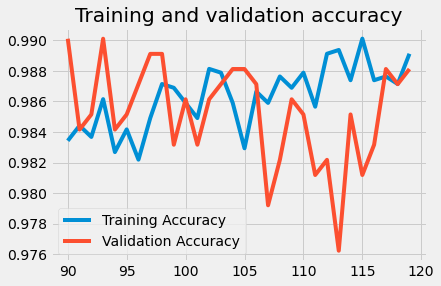

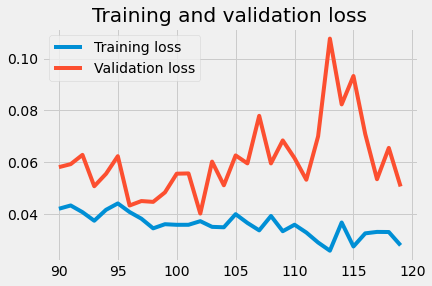

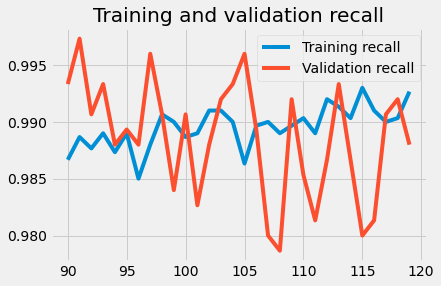

In [112]:
plot_performance(model.history)

In [113]:
# saving model
model.save('MODEL/model1.h5')

Validation loss is consistently less than training loss. This is probably because the data augmentation is resulting in data that is more difficult to figure out. Additionally training loss seems to converge very slowly, I'll try to decrease the complexity.

### Model 2 
This time we will decrease the complexity of the network and reduce the data augmentation criteria to make sure that the training problem is not unreasonably difficult.

In [129]:
data_aug_train2 = image.ImageDataGenerator(rescale = 1/255,
                                   brightness_range = [0.7, 1.0],
                                   zoom_range = 0.1)

train_g3 = data_aug_train2.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')

# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g3, 
                    epochs=50, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

# saving model
model.save('MODEL/model2.h5')

Found 4043 images belonging to 2 classes.
Epoch 1/50
127/127 [==============================] - 80s 632ms/step - loss: 0.3173 - accuracy: 0.8603 - recall: 0.9454 - val_loss: 0.1906 - val_accuracy: 0.9168 - val_recall: 0.8960
Epoch 2/50
127/127 [==============================] - 81s 634ms/step - loss: 0.1535 - accuracy: 0.9392 - recall: 0.9583 - val_loss: 0.0944 - val_accuracy: 0.9614 - val_recall: 0.9853
Epoch 3/50
127/127 [==============================] - 80s 627ms/step - loss: 0.1299 - accuracy: 0.9498 - recall: 0.9667 - val_loss: 0.0923 - val_accuracy: 0.9663 - val_recall: 0.9853
Epoch 4/50
127/127 [==============================] - 81s 637ms/step - loss: 0.1261 - accuracy: 0.9515 - recall: 0.9657 - val_loss: 0.0782 - val_accuracy: 0.9782 - val_recall: 0.9907
Epoch 5/50
127/127 [==============================] - 80s 632ms/step - loss: 0.1120 - accuracy: 0.9570 - recall: 0.9663 - val_loss: 0.0739 - val_accuracy: 0.9812 - val_recall: 0.9907
Epoch 6/50
127/127 [=======================

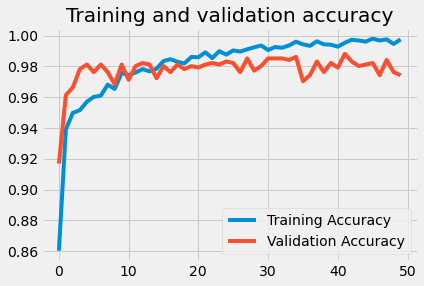

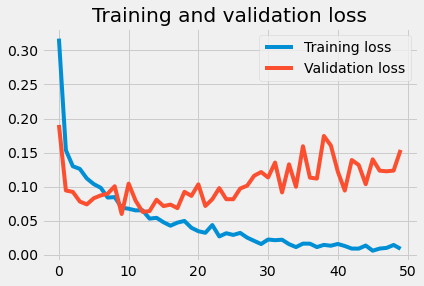

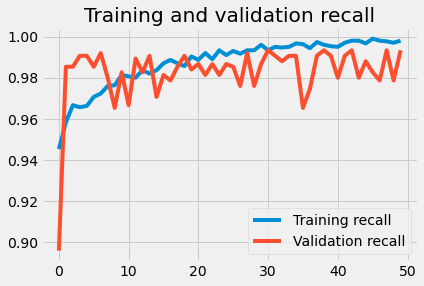

In [130]:
plot_performance(model.history)

It seems like the performance is plateauing at around epoch 10-12.

In [150]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g3, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

# saving model
model.save('MODEL/model2b.h5')

Epoch 1/20
127/127 [==============================] - 95s 749ms/step - loss: 0.2557 - accuracy: 0.8899 - recall: 0.9527 - val_loss: 0.1321 - val_accuracy: 0.9574 - val_recall: 0.9573
Epoch 2/20
127/127 [==============================] - 98s 769ms/step - loss: 0.1488 - accuracy: 0.9436 - recall: 0.9657 - val_loss: 0.0984 - val_accuracy: 0.9624 - val_recall: 0.9773
Epoch 3/20
127/127 [==============================] - 94s 737ms/step - loss: 0.1149 - accuracy: 0.9582 - recall: 0.9730 - val_loss: 0.0850 - val_accuracy: 0.9673 - val_recall: 0.9613
Epoch 4/20
127/127 [==============================] - 93s 731ms/step - loss: 0.1116 - accuracy: 0.9565 - recall: 0.9697 - val_loss: 0.0682 - val_accuracy: 0.9772 - val_recall: 0.9733
Epoch 5/20
127/127 [==============================] - 92s 725ms/step - loss: 0.1047 - accuracy: 0.9619 - recall: 0.9710 - val_loss: 0.0963 - val_accuracy: 0.9624 - val_recall: 0.9640
Epoch 6/20
127/127 [==============================] - 93s 729ms/step - loss: 0.0948 -

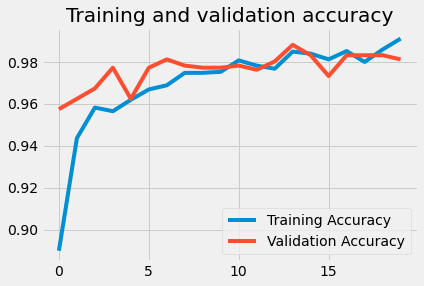

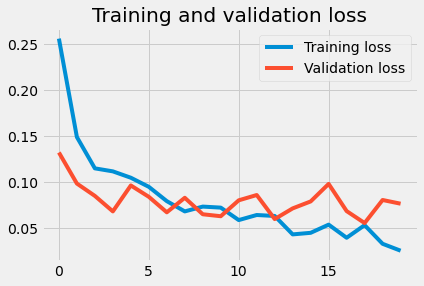

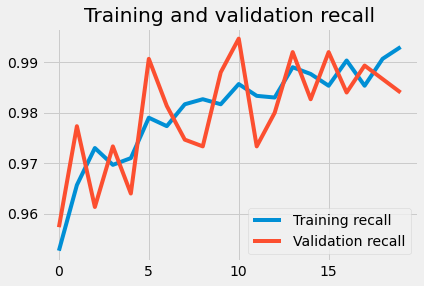

In [151]:
plot_performance(model.history)

### Model 3
---
Now I'll keep it at the current model complexity and try to increase the augmentation range slightly.

In [6]:
# try adding slight rotation
data_aug_train3 = image.ImageDataGenerator(rescale = 1/255,
                                           brightness_range = [0.6, 1.0],
                                           rotation_range = 10,
                                           zoom_range = 0.2)

train_g4 = data_aug_train3.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')



Found 4043 images belonging to 2 classes.


In [ ]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g4, 
                    epochs=30, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

# saving model
model.save('MODEL/model3.h5')


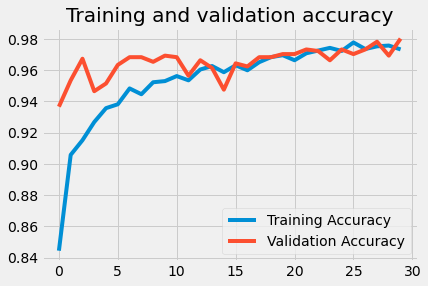

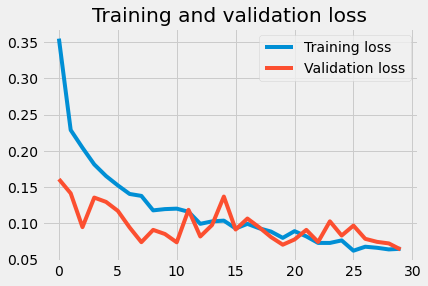

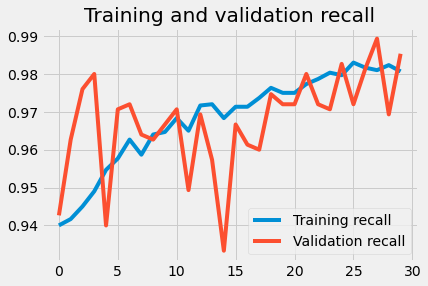

In [157]:
plot_performance(model.history)

It seems like we can run a couple more epochs. Also maybe a bit more complexity in the model, since training loss also seems to be plateauing.

## Model 4
---
To model 4, we will add some more units.

In [166]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g4, 
                    epochs=60, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

# saving model
model.save('MODEL/model4.h5')


Epoch 1/30
127/127 [==============================] - 140s 1s/step - loss: 0.3846 - accuracy: 0.8358 - recall: 0.9314 - val_loss: 0.2100 - val_accuracy: 0.9257 - val_recall: 0.9053
Epoch 2/30
127/127 [==============================] - 140s 1s/step - loss: 0.2422 - accuracy: 0.8971 - recall: 0.9390 - val_loss: 0.1455 - val_accuracy: 0.9485 - val_recall: 0.9520
Epoch 3/30
127/127 [==============================] - 139s 1s/step - loss: 0.1919 - accuracy: 0.9204 - recall: 0.9474 - val_loss: 0.0876 - val_accuracy: 0.9663 - val_recall: 0.9747
Epoch 4/30
127/127 [==============================] - 139s 1s/step - loss: 0.1837 - accuracy: 0.9248 - recall: 0.9513 - val_loss: 0.0821 - val_accuracy: 0.9663 - val_recall: 0.9693
Epoch 5/30
127/127 [==============================] - 139s 1s/step - loss: 0.1604 - accuracy: 0.9379 - recall: 0.9573 - val_loss: 0.1635 - val_accuracy: 0.9317 - val_recall: 0.9120
Epoch 6/30
127/127 [==============================] - 140s 1s/step - loss: 0.1443 - accuracy: 0

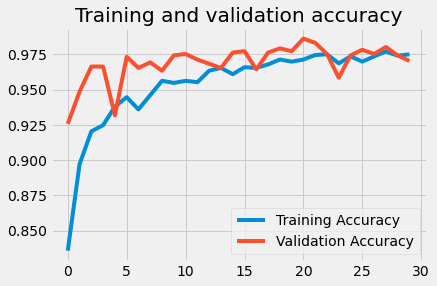

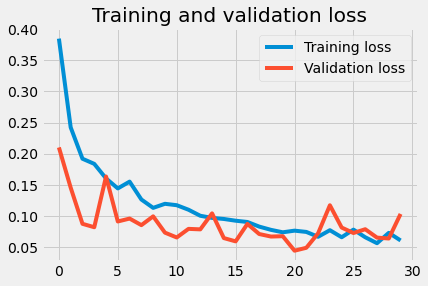

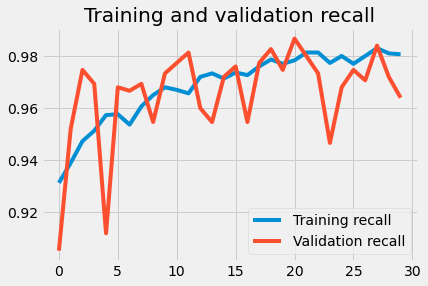

In [168]:
plot_performance(model.history)

It seems like we can run some more epochs.

In [170]:
# training
start = timer()

history = model.fit(train_g4,
                    initial_epoch = 30,
                    epochs=50, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')


Epoch 31/50
127/127 [==============================] - 141s 1s/step - loss: 0.0628 - accuracy: 0.9753 - recall: 0.9817 - val_loss: 0.0856 - val_accuracy: 0.9723 - val_recall: 0.9653
Epoch 32/50
127/127 [==============================] - 141s 1s/step - loss: 0.0644 - accuracy: 0.9760 - recall: 0.9820 - val_loss: 0.0607 - val_accuracy: 0.9802 - val_recall: 0.9787
Epoch 33/50
127/127 [==============================] - 141s 1s/step - loss: 0.0497 - accuracy: 0.9827 - recall: 0.9867 - val_loss: 0.1081 - val_accuracy: 0.9762 - val_recall: 0.9947
Epoch 34/50
127/127 [==============================] - 140s 1s/step - loss: 0.0586 - accuracy: 0.9780 - recall: 0.9833 - val_loss: 0.0514 - val_accuracy: 0.9832 - val_recall: 0.9813
Epoch 35/50
127/127 [==============================] - 138s 1s/step - loss: 0.0449 - accuracy: 0.9844 - recall: 0.9877 - val_loss: 0.0609 - val_accuracy: 0.9812 - val_recall: 0.9787
Epoch 36/50
127/127 [==============================] - 139s 1s/step - loss: 0.0487 - accur

In [174]:
model.save('MODEL/model4.h5')

Training loss still not converging. 

## Model 5
---
We'll try increasing overall units at all layers except input layer to see how it affects the performance.

In [12]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g4,
                    initial_epoch = 20,
                    epochs=50, 
                    validation_data=val_g, 
                    workers = 8, 
                    verbose = 1
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

# saving model
#model.save('MODEL/model5b.h5')


Epoch 21/50
127/127 [==============================] - 263s 2s/step - loss: 0.1034 - accuracy: 0.9619 - recall: 0.9707 - val_loss: 0.0809 - val_accuracy: 0.9733 - val_recall: 0.9693
Epoch 22/50
127/127 [==============================] - 264s 2s/step - loss: 0.0789 - accuracy: 0.9666 - recall: 0.9760 - val_loss: 0.0873 - val_accuracy: 0.9723 - val_recall: 0.9680
Epoch 23/50
127/127 [==============================] - 264s 2s/step - loss: 0.0860 - accuracy: 0.9676 - recall: 0.9757 - val_loss: 0.0854 - val_accuracy: 0.9743 - val_recall: 0.9787
Epoch 24/50
127/127 [==============================] - 268s 2s/step - loss: 0.0713 - accuracy: 0.9723 - recall: 0.9810 - val_loss: 0.1128 - val_accuracy: 0.9663 - val_recall: 0.9613
Epoch 25/50
127/127 [==============================] - 268s 2s/step - loss: 0.0701 - accuracy: 0.9738 - recall: 0.9797 - val_loss: 0.0649 - val_accuracy: 0.9772 - val_recall: 0.9813
Epoch 26/50
127/127 [==============================] - 267s 2s/step - loss: 0.0853 - accur

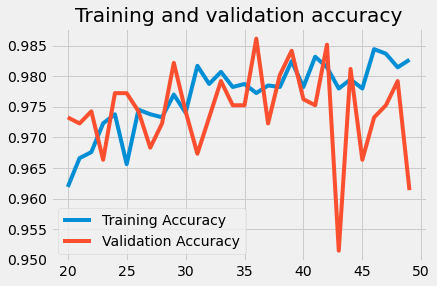

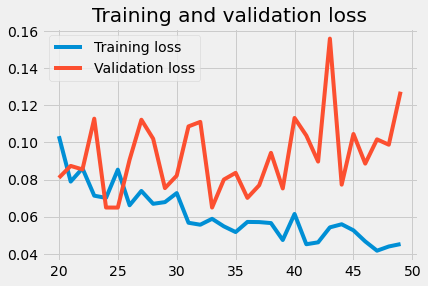

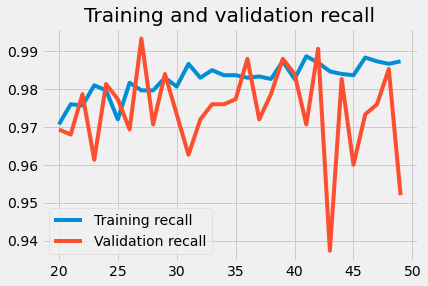

In [13]:
plot_performance(model.history)

# Final Model Evaluation
---
Testing the models on the test set

In [22]:
baseline_model = models.load_model('MODEL/baseline_model.h5')
balanced_weight = models.load_model('MODEL/balanced_weight.h5')
model1 = models.load_model('MODEL/model1.h5')
model2 = models.load_model('MODEL/model2.h5')
model2b = models.load_model('MODEL/model2b.h5')
model3 = models.load_model('MODEL/model3.h5')
model4 = models.load_model('MODEL/model4.h5')
model5 = models.load_model('MODEL/model5b.h5')

In [89]:
#testing
baseline_hist = baseline_model.evaluate(test_g, workers = 8, verbose = 2)
balanced_hist = balanced_weight.evaluate(test_g, workers = 8, verbose = 2)
model1_hist = model1.evaluate(test_g, workers = 8, verbose = 2)
model2_hist = model2.evaluate(test_g, workers = 8, verbose = 2)
model2b_hist = model2b.evaluate(test_g, workers = 8, verbose = 2)
model3_hist = model3.evaluate(test_g, workers = 8, verbose = 2)
model4_hist = model4.evaluate(test_g, workers = 8, verbose = 2)
model5_hist = model5.evaluate(test_g, workers = 8, verbose = 2)

19/19 - 2s - loss: 3.7529 - accuracy: 0.8328 - recall_8: 0.9943
19/19 - 2s - loss: 0.8893 - accuracy: 0.8703 - recall_9: 0.9858
19/19 - 2s - loss: 0.5625 - accuracy: 0.9181 - recall_10: 0.9830
19/19 - 2s - loss: 1.2424 - accuracy: 0.8771 - recall_11: 0.9972
19/19 - 2s - loss: 0.5914 - accuracy: 0.9010 - recall_12: 0.9972
19/19 - 2s - loss: 0.3485 - accuracy: 0.9249 - recall_13: 0.9915
19/19 - 3s - loss: 0.2512 - accuracy: 0.9488 - recall_14: 0.9716
19/19 - 7s - loss: 0.3683 - accuracy: 0.9181 - recall_15: 0.9830


In [24]:
# clean up ones without high performance
clean_up([balanced_weight, model1, model2, model5])

32


## Visualizing Where Model Failed
Using a model with 95% accuracy, we'll take a look at where our model failed.

ImageDataGenerator is not returning correct indices for prediction, so instead we'll iterate through each file and figure out the prediction. This is possible because test set is relatively small (< 600)

In [117]:
test_g0 = image.ImageDataGenerator(rescale = 1/255)

def get_pred(path):
    filelist = os.listdir(path)
    result = {}

    for fn in filelist:
        image_ = image.load_img(f'{path}/{fn}', 
                                target_size = (150,150), 
                                color_mode='grayscale')
        input_ = np.array([image.img_to_array(image_)])
        input_f = test_g0.flow(input_)
        result[fn] = int(np.where(model4.predict(input_f)[0] > 0.5, 1, 0))
    return result

In [118]:
Neg_class_preds = get_pred('DATA/test/normal')
Pos_class_preds = get_pred('DATA/test/pneumonia')

In [122]:
FP_list = [k for k, v in Neg_class_preds.items() if v != 0]
FN_list = [k for k, v in Pos_class_preds.items() if v != 1]

### Confusion Matrix

In [129]:
# getting numbers for confusion matrix
FP = len(FP_list)
FN = len(FN_list)
TP = len(Neg_class_preds) - FP
TN = len(Pos_class_preds) - FN

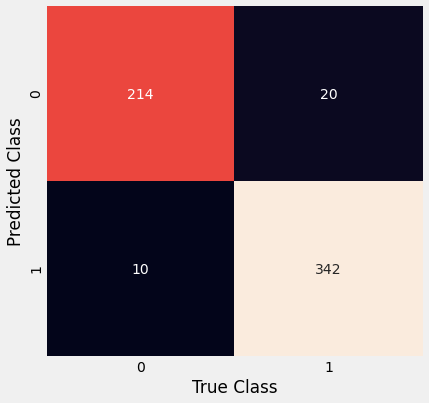

In [140]:
import seaborn as sns
cm = [[TP, FP], [FN, TN]]
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot=True, fmt="d", cbar = False)
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

### Sample Wrong Predictions

In [158]:
def plot_img(path, title):
    fn = image.load_img(path, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(title)
    plt.axis('off')
    plt.show()

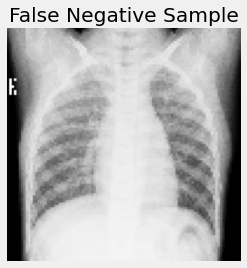

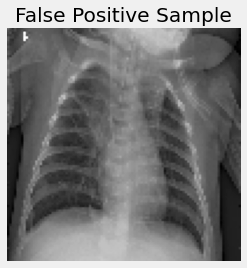

In [161]:
plot_img(f'DATA/test/normal/{np.random.choice(FP_list, 1)[0]}', 'False Negative Sample')
plot_img(f'DATA/test/pneumonia/{np.random.choice(FN_list, 1)[0]}', 'False Positive Sample')